In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

In [2]:
def roll_columns(matrix, r):
    row_indices, columns = np.ogrid[:matrix.shape[0], :matrix.shape[1]]
    r[r < 0] += matrix.shape[1]
    row_indices = row_indices - r
    result = matrix[row_indices, columns]
    return result

def calc_sums(image, xmin, xmax):
    result = np.zeros((image.shape[0], xmax - xmin + 1))

    if xmax - xmin == 1:
        result[:, 0] = image[:, xmin]
    else:
        mid = (xmax + xmin) // 2
        left_column = calc_sums(image, xmin, mid)
        right_column = calc_sums(image, mid, xmax)

        shift = np.arange(xmax - xmin + 1).astype(int)
        rolled_matrix = roll_columns(right_column[:, shift // 2 - shift % 2], shift // 2 + shift % 2)

        result[:, shift] = left_column[:, shift // 2] + rolled_matrix

    return result

def fht(image):
    hough_space = calc_sums(image, 0, image.shape[1])
    hough_space_hor = calc_sums(image[:, ::-1], 0, image.shape[1])

    return np.hstack([hough_space[:, ::-1], hough_space_hor])

In [3]:
sizes = np.arange(50, 3500, 50)
times = np.zeros(len(sizes))

for i, size in tqdm(enumerate(sizes)):
    image = np.random.random([size, size])
    
    start = time.time()
    transform = fht(image)
    end = time.time()
    
    times[i] = end - start

69it [04:14,  3.68s/it]


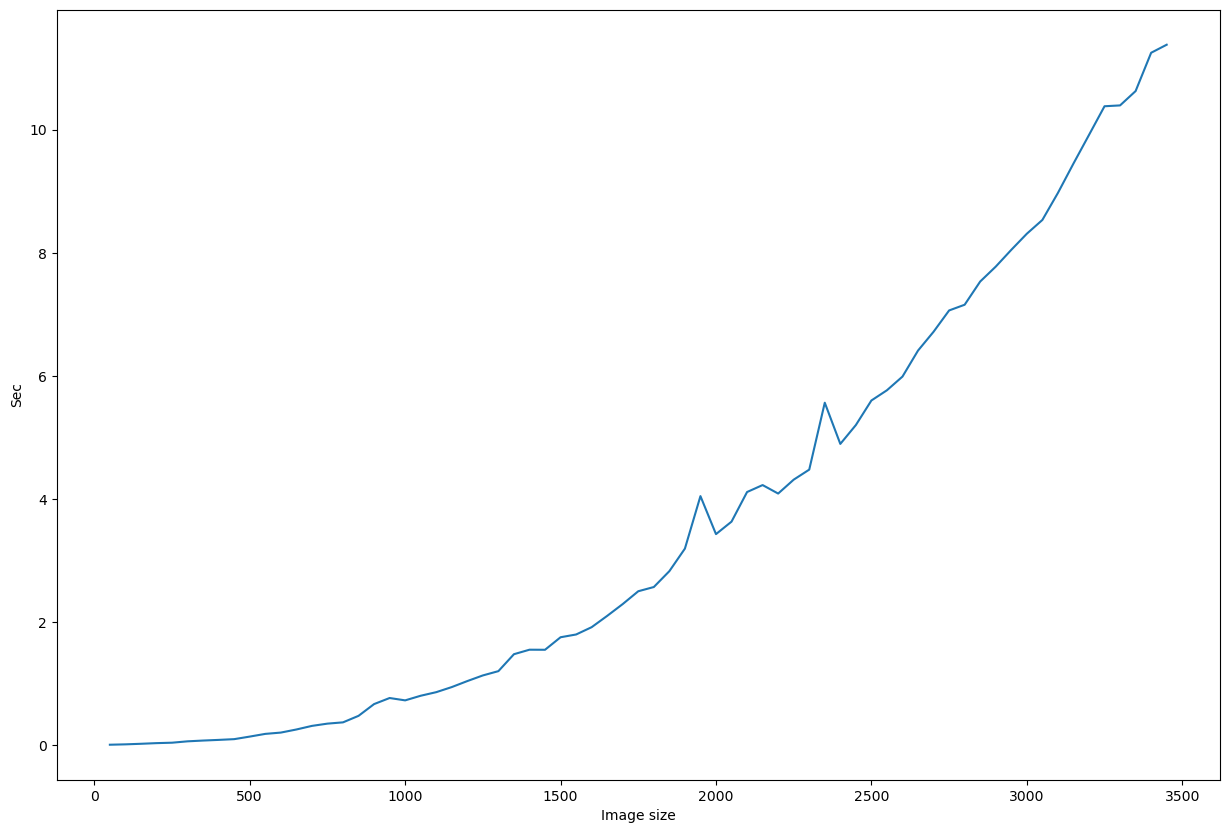

In [4]:
plt.figure(figsize=(15, 10))

plt.plot(sizes, times)
plt.xlabel('Image size')
plt.ylabel('Sec')

plt.show()

Итоговая сложность О(n^2 * log(n))